# Procesamiento de textos en el corpus

En esta notebook seguiremos el proceso de limpieza manual del corpus creado para estas clases, donde buscaremos comparar textos de economía política de diversos autores, y se creará la distribución de frecuencia de diversas palabras.

## Archivos del Corpus

El corpus para esta ejercitación consiste en diversas obras de dos economistas que en los últimos meses han sido nombrados muchas veces por todo el espectro político argentino.
Estos son John Maynard Keynes y Friedrich August Von Hayek, quienes se enfrentaron en una polémica desde finales de la década del 20 del siglo anterior. Este debate cimentó las divisiones del pensamiento económico actual. Desde el análisis sobre el papel del Estado hasta la política en la gestión económica.

Los archivos del corpus están disponibles en la carpeta `assets\corpus` y los unificaremos como ``keynes_text`` y ``hayek_text``

Vamos a instalar e importar las librerías con las que trabajaremos:
* [OS](https://docs.python.org/es/3/library/os.html), es fundamental para realizar manipulación de archivos y directorios en Python
* [Natural Language Toolkit (NLTK)](http://www.nltk.org/), una potente biblioteca que es utilizada para trabajar con lenguaje natural en Python. Esta proporciona herramientas para tokenización, etiquetado, análisis de texto, corpus de datos, etc.
* [Matplotlib](https://matplotlib.org/), es una biblioteca de visualización. Es utilizada para generar gráficos de los resultados de los análisis realziados, como la frecuencia de palabras. 
* [Re](https://docs.python.org/es/3/library/re.html), módulo para trabajar con expresiones regulares. Es muy útil al momento de realizar limpieza y preprocesamiento del texto, pues elimina caracteres no deseados y normaliza el formato.
* [TextBlob](https://textblob.readthedocs.io/en/dev/), es una librería de procesamiento del texto para Python. Esta permite realizar tareas de Procesamiento del Lenguaje Natural como análisis morfológico, extracción de entidades, análisis de opinión, traducción automática, etc.

In [37]:
#pip install textblob o !pip install textblob 
#Recordar que si sale un mensaje de módulo no encontrado, deberás instalarlo

In [2]:
import os
import nltk 
from nltk.corpus import stopwords #Importa la lista stopwords para eliminan las palabras comunes de un corpus
from nltk.probability import FreqDist #Módulo de la librería que es útil para calcular la frecuencia de aparición de elementos (como palabras) en un texto.
import matplotlib.pyplot as plt #módulo que utilizaremos para graficar
import re

El código que sigue lo utilizaremos para leer los archivos que empiecen con los nombres de los dos autores a trabajar. 

In [3]:
import os
# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/corpus'

# Generamos una lista vacía para almacenar los textos
keynes_texts = []

# Realizamos una iteración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprobamos si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('keynes') and archivo.endswith('.txt'):
        # Construímos la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abrir y leer el archivo
        with open(ruta_completa, 'r', encoding='ISO-8859-1', errors='replace') as f: #en este punto se puede modificar la codificación, con utf-8 observé demasiados errores
            texto = f.read()
            # Añadir el contenido del archivo a la lista
            keynes_texts.append(texto)

for texto in keynes_texts[:2]:
    print(texto)






1 
.: 
.1 
·1 












X:XU l¡r,;TRQOtJCCIÓX 
denuncia la impotencia de los llamados expertos para explié:?r-!z siroaci: No hay exper­tos: ~La ciencia de la economía, de la banca y de las finanzas está muy arrasada~ (1931, XX, pág. 516)11. Es posible que el avance del conocimiento permira que los expenos 
puedan afromar la prima depresin, pero en la actual predomina el desconcierto. No es un problema de técnica, ni de recur.sos o capacidad productiva: 
Es-me avenruro a afumar-nada má, que la quiebra del misterioso poder de coor· dioaci de la banca. y las finanzas. ¿Co lo diría? Este poder de coordinar na falla­do en cr~ d enromo ffl e[ que nucsrcas energías encuentren la aplicaci apropiada (ioíckm, pá~ s11¡. 
2.2. Viaje a los Estados UJtidos (mayo-¡11lio de 1931) 
La justificaci principal de su viaje era dar tres conferencias en Chicago, ca la Harris Foundarion, sobre el cerna "An Economic Analysis of Unemployment. Además, comparce en reuniones para debatir la situaci econica

In [4]:
#Ahora repetimos para Hayek

# Nos situamos en la carpeta donde se encuentran los archivos
carpeta = 'assets/corpus'

# Generamos una lista vacía para almacenar los textos
hayek_texts = []

# Realizamos una itración sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    # Comprueba si el archivo comienza con 'keynes' y termina con '.txt'
    if archivo.startswith('hayek') and archivo.endswith('.txt'):
        # Construye la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        # Abre y lee el archivo
        with open(ruta_completa, 'r', encoding='utf-8', errors='replace') as f: #modificar la codificación si es necesario
            texto = f.read()
            # Añade el contenido del archivo a la lista
            hayek_texts.append(texto)

# Presentamos la lista con los textos cargados
for texto in hayek_texts[:2]:
    print(texto)

1





Friedrich A. Hayek

LOS FUNDAMENTOS

DE LA LIBERTAD





2





ISBN

0

1

Unión Editorial

Madrid, 01





Título original: The Constitution of Liberty Friedrich A. Hayek, 1960

Traducción: José Vicente Torrente Secorún





3





A la desconocida civilización que se está desarrollando en América.





4





PREFACIO

El propósito de esta obra lo explica más adelante la Introducción. Los pocos párrafos que concluyen esta nota testimonian mi gratitud a aquellas personas con quienes estoy en deuda. Sólo me resta, por tanto, hacer una advertencia y presentar una disculpa.

Mi obra no se refiere principalmente a lo que la ciencia enseña. Aunque no hubiera sido posible escribirla sin dedicar gran parte de mi vida al estudio de la economía y consagrarme recientemente a informarme sobre las conclusiones de otras varias ciencias sociales, no me refiero exclusivamente a hechos ni me limito a relaciones de causa y efecto.

Mi objetivo es describir un ideal, demostrar cómo puede alcanz

##### Explicación del código

* ``os.listdir (carpeta)``, realiza una lista de todos los archivos en la carpeta especificada.
* ``archivo.startswith(' ')`` and ``archivo.endswith('.txt')``, filtra los archivos que comienzan con los caracteres que se especifique entre comillas simples y termine con ".txt"
* ``os.path.join(carpeta, archivo)``, con este comando indicamos que se construya la ruta completa para acceder al archivo
* `with open(ruta_completa, 'r', encoding='utf-8') as f:`: Abrirá el archivo en modo lectura con codificación UTF-8 o la especificada
* ``f.read()``: Leerá el contenido del archivo
* ``keynes_texts.append(texto)``: Se añadirá el contenido del archivo a la lista keynes_texts o hayek_texts
* Con ``for texto in keynes_texts[:5]:`` ``print(texto)`` nos aseguramos que si hay algo en la lista lo presentará sino indicará que la lista está vacía. 

## Preparición del texto para procesarlo

Previo al procesamiento del corpus, deberemos realizar algunos cambios, eliminar las palabras vacías (stopwords) en español, y cargar el tokenizador en el idioma que trabajamos.

Recordemos que las palabras vacías son las más abundantes en un texto, y están conformadas por verbos de uso común, artículos, preposiciones, etc.

La tokenización es un proceso por el cual se divide un texto en unidades más pequeñas, que se denominan **tokens**. Estos pueden ser palabras, frases o caracteres.

##### Creamos una función de preprocesamiento

A continuación generaremos una función para trabajar con nuestros textos, en ella indicaremos, que convierta todo a minúsculas, que elimine y sustituta los caracteres que no sean alfanuméricos, por espacios. Luego que tokenize el texto, y por último que elimine las palabras vacías.

En el paso de cargar stopwords, he dejado una opción que utilicé una vez realicé una primera lectura, la forma correcta de dicha línea:

`custom_stopwords = {'hecho', 'cualquier', 'puede', 'pues', 'parte', 'mayoría', 'sino', 'producci', 'tipo', 'sólo', 'tales', 'general', 'isbn'}`

In [14]:
nltk.download('punkt') #lo utilizaremos para tokenizar el texto
nltk.download('stopwords')

# armamos un patrón de expresión regular para eliminar caracteres no alfanuméricos
non_alpha_numeric = re.compile(r'\b(?!\d{4}\b)\W+') # \b: Denota un límite de palabra. Esto asegura que el patrón coincida solo si está al principio o al final de una palabra.
#(?!\d{4}\b): Esta es una negativa, si encuentra 4 dígitos seguidos de un límite de palabra (\b), no hará la sustitución.
#\W+ coincide con cualquier carácter que no sea alfanumérico (espacios, puntuaciones, etc.), y + indica una o más repeticiones de dichos caracteres.

#definimos la función preprocess 
def preprocess(text):
    # Convertimos a minúsculas
    text = text.lower()
    
    # Eliminamos caracteres no alfanuméricos que no forman parte de las palabras, mediante .sub, y se reemplazan con espacios
    text = non_alpha_numeric.sub(' ', text)
    
    # Tokenizamos el texto en palabras individuales
    tokens = nltk.word_tokenize(text, language='spanish')
    
    # Optimizamos nuestra lista de stopwords en español, agregando palabras adicionales
    spanish_stopwords = set(stopwords.words('spanish'))
    custom_stopwords = {}#'hecho', 'cualquier', 'puede', 'pues', 'parte', 'mayoría', 'sino', 'producci', 'tipo', 'sólo', 'tales', 'general', 'isbn'} #estas palabras fueron añadidas luego de un primer procesamiento
    all_stopwords = spanish_stopwords.union(custom_stopwords)
    
    # Eliminamos stopwords en español y palabras con menos de 3 caracteres
    tokens = [word for word in tokens if word not in all_stopwords and len(word) >= 3]
    
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Aplicamos la función a nuestros de textos
keynes_tokens = [token for text in keynes_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(keynes_tokens[:3])  # Imprime los primeros 2 textos preprocesados

['trqotjccióx', 'denuncia', 'impotencia']


In [16]:
# Ahora para los textos de Hayek

hayek_tokens = [token for text in hayek_texts for token in preprocess(text)]

# Mostrar los primeros elementos de la lista preprocesada para verificar
print(hayek_tokens[:3])  # Imprime los primeros 2 textos preprocesados

['friedrich', 'hayek', 'fundamentos']


### Cálculo de frecuencia de palabras

Para ello utilizaremos `FreqDist` de la biblioteca **NLTK** para calcular la frecuencia de las palabras de los textos

In [17]:
# Frecuencia de Palabras
keynes_fd = FreqDist(keynes_tokens) #permite calcular la distribución de frecuencias de una lista de elementos
# Imprime las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Keynes:")
print(keynes_fd.most_common(10)) #devuelve una lista de las 10 palabras más comunes, junto con sus frecuencias. El resultado es una lista de tuplas, donde cada tupla contiene una palabra y su frecuencia.


Palabras más comunes en los textos de Keynes:
[('precios', 1240), ('vol', 1187), ('dinero', 1164), ('oro', 959), ('puede', 951), ('tipo', 791), ('valor', 745), ('banco', 699), ('nivel', 682), ('bancos', 649)]


In [19]:
# Frecuencia de Palabras para textos de Hayek

hayek_fd = FreqDist(hayek_tokens)
# Imprimir las 10 palabras más comunes en los textos de Keynes
print("Palabras más comunes en los textos de Hayek:")
print(hayek_fd.most_common(10))

Palabras más comunes en los textos de Hayek:
[('libertad', 978), ('sólo', 878), ('puede', 844), ('the', 781), ('ser', 770), ('tal', 760), ('bienes', 650), ('ley', 624), ('bien', 574), ('producción', 564)]


#### Cálculo de la densidad de vocabulario

La densidad de vocabulario nos indica cuántas palabras únicas (distintas) hay en un texto en relación con el número total de palabras.

In [20]:
# Densidad de Vocabulario
keynes_vocabulary_density = len(set(keynes_tokens)) / len(keynes_tokens)
#set convierte la lista en un conjunto, eliminando las palabras repetidas
#len calcula los elementos
hayek_vocabulary_density = len(set(hayek_tokens)) / len(hayek_tokens)

In [21]:
print("La densidad del vocabulario en los textos de Keynes es:")
print(keynes_vocabulary_density)

La densidad del vocabulario en los textos de Keynes es:
0.22519319657467696


In [22]:
print("La densidad del vocabulario en los textos de Hayek es:")
print(hayek_vocabulary_density)

La densidad del vocabulario en los textos de Hayek es:
0.12637688734978791


Comparamos la densidad del vocabulario utilizado por cadaautor

In [23]:
#O podemos comparar la densidad de vocabulario de la siguiente manera: 
print(f"Densidad de Vocabulario en Keynes: {keynes_vocabulary_density}")
print(f"Densidad de Vocabulario en Hayek: {hayek_vocabulary_density}")

Densidad de Vocabulario en Keynes: 0.22519319657467696
Densidad de Vocabulario en Hayek: 0.12637688734978791


### Visualización de las frecuencias

Ahora graficaremos las frecuencias utilizando **Matplotlib**.

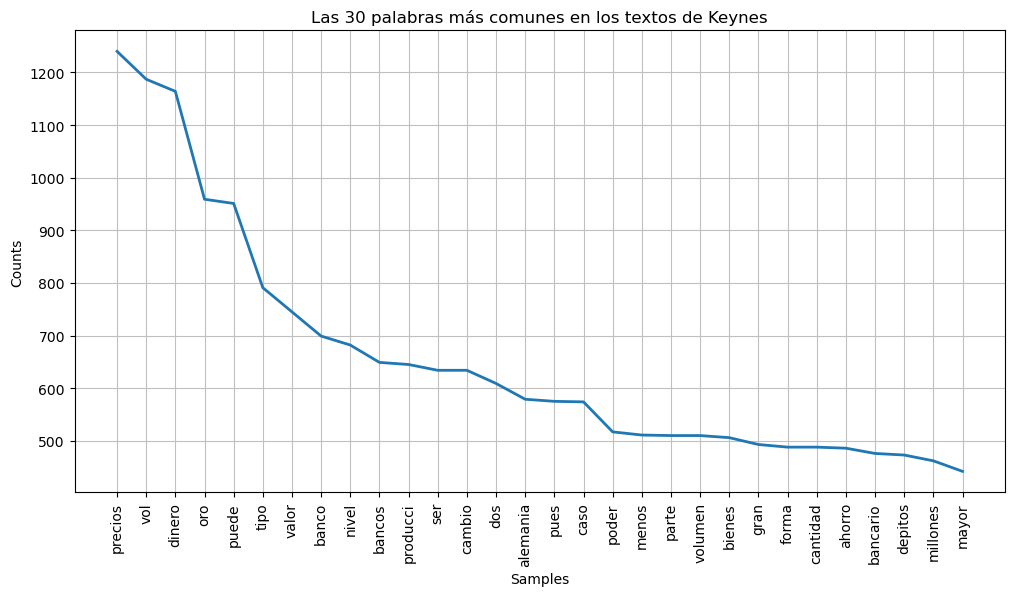

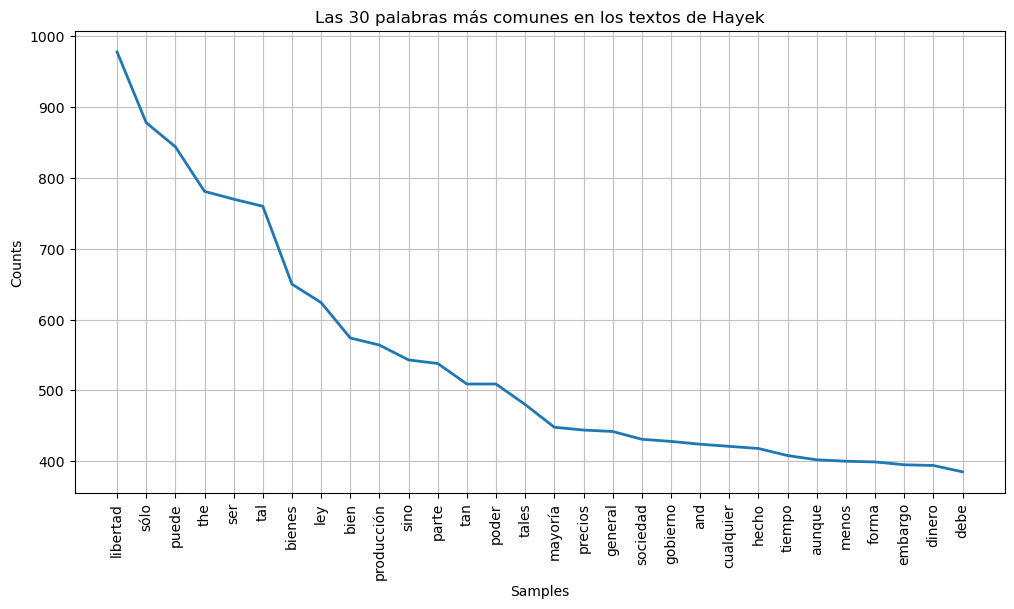

<Axes: title={'center': 'Las 30 palabras más comunes en los textos de Hayek'}, xlabel='Samples', ylabel='Counts'>

In [24]:
# COnfiguramos el tamaño de las Graficas
plt.figure(figsize=(12, 6))

# Visualización de Frecuencias
keynes_fd.plot(30, title="Las 30 palabras más comunes en los textos de Keynes")

plt.figure(figsize=(12, 6))
hayek_fd.plot(30, title="Las 30 palabras más comunes en los textos de Hayek")

Ahora realizaremos una superposición entre ambos autores comparandos las palabras más frecuentes en cada

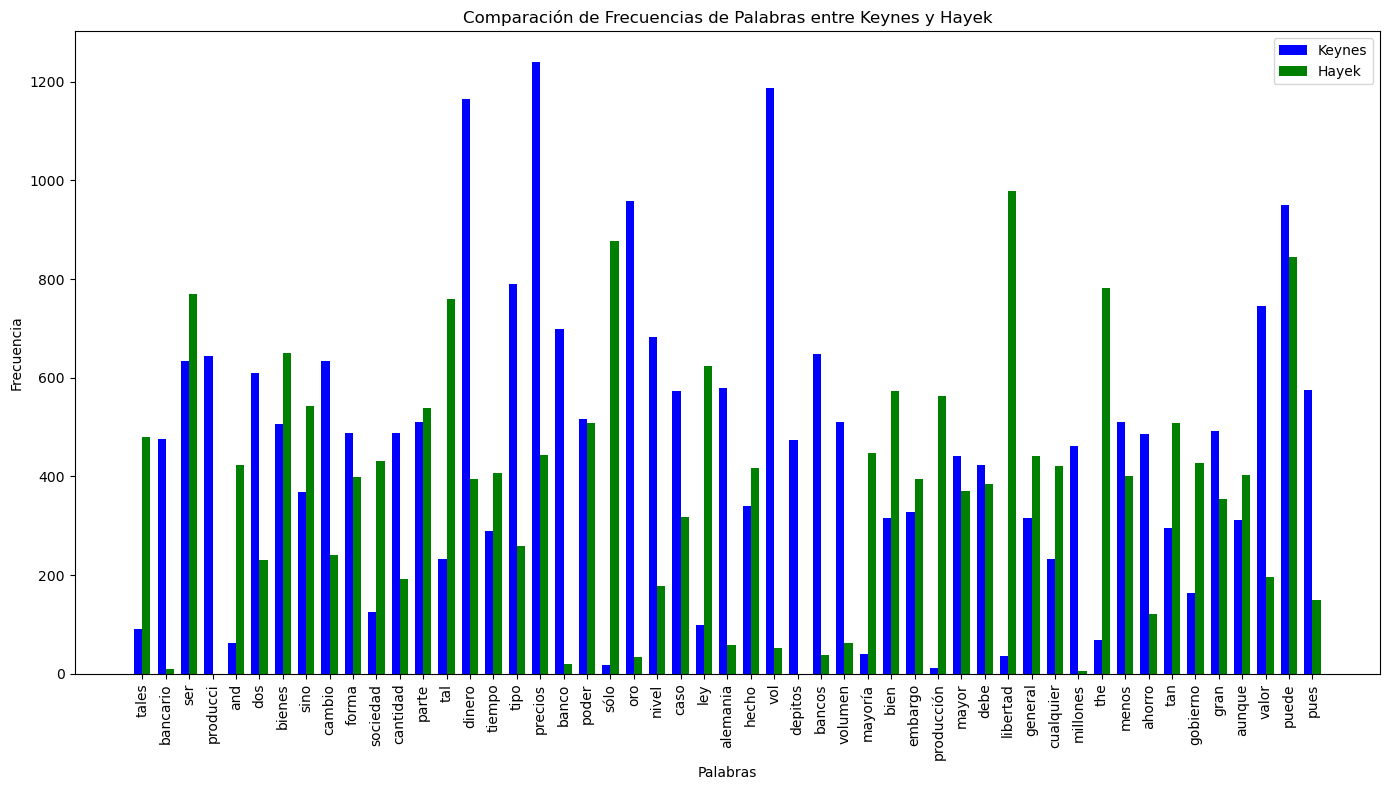

In [27]:
# Gráfica de superposición comparativa

# Obtenemos las 30 palabras más comunes para c/u
keynes_common = keynes_fd.most_common(30)
hayek_common = hayek_fd.most_common(30)

# Extraemos las palabras y sus frecuencias
keynes_words, keynes_freqs = zip(*keynes_common) #toma los elementos de cada lista y los itera
hayek_words, hayek_freqs = zip(*hayek_common)
#zip(*keynes_common) descomprime (con el *) la tupla en dos listas separadas: una para las palabras y otra para las frecuencias.

# Creamos un set con las palabras únicas de ambos conjuntos
all_words = set(keynes_words).union(set(hayek_words))

# Creamos listas con las frecuencias, alineadas con el set `all_words`
keynes_freqs_aligned = [keynes_fd[word] if word in keynes_fd else 0 for word in all_words]
hayek_freqs_aligned = [hayek_fd[word] if word in hayek_fd else 0 for word in all_words]

# Configuramos el gráfico
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Ancho de las barras

# Posiciones de las barras en el eje X
index = range(len(all_words))

# Creamos las barras del gráfico
plt.bar(index, keynes_freqs_aligned, bar_width, label='Keynes', color='blue')
plt.bar([i + bar_width for i in index], hayek_freqs_aligned, bar_width, label='Hayek', color='green') #con bar_width indicamos que las barras estén una al lado de la otra

# etiquetas y título
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias de Palabras entre Keynes y Hayek')

# Agregamos marcas de posiciones con las palabras y ajustar la rotación
plt.xticks([i + bar_width / 2 for i in index], all_words, rotation=90)

# leyenda
plt.legend()

# Ajustamos el layout para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##### Se les ocurre cómo podrían calcular/graficar las palabras menos frecuentes

 **Pista** utilicen el código anterior inviertiendo el rango de palabras más comunes

### Ley de Zipf

Recuerden lo visto en la parte teórica sobre esta ley. Para ello, primero ordenaremos las frecuencias de cada texto, y luego graficaremos la relación entre rangos de palabras y frecuencias en los textos en escala algorítmica.

In [29]:
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np #esta libería es útil para las operaciones numéricas y con matrices

# Extraemos las frecuencias y las ordenamos generando dos listas con las frecuencias
keynes_freq = [freq for _, freq in keynes_fd.items()] #
# keynes_fd.items() devuelve los pares (palabra, frecuencia) de FreqDist, pero solo extrae la frecuencia ignorando la palabra
hayek_freq = [freq for _, freq in hayek_fd.items()]

# Ordenamos las frecuencias de mayor a menor con sorted
keynes_freq_sorted = sorted(keynes_freq, reverse=True)
hayek_freq_sorted = sorted(hayek_freq, reverse=True)


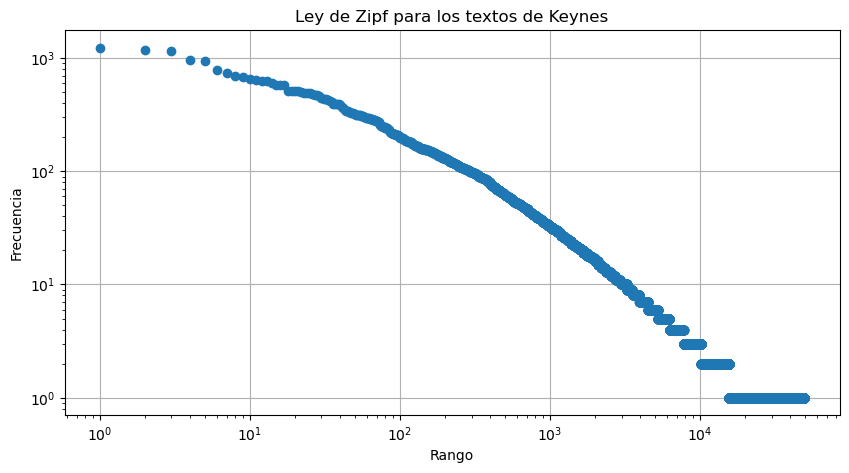

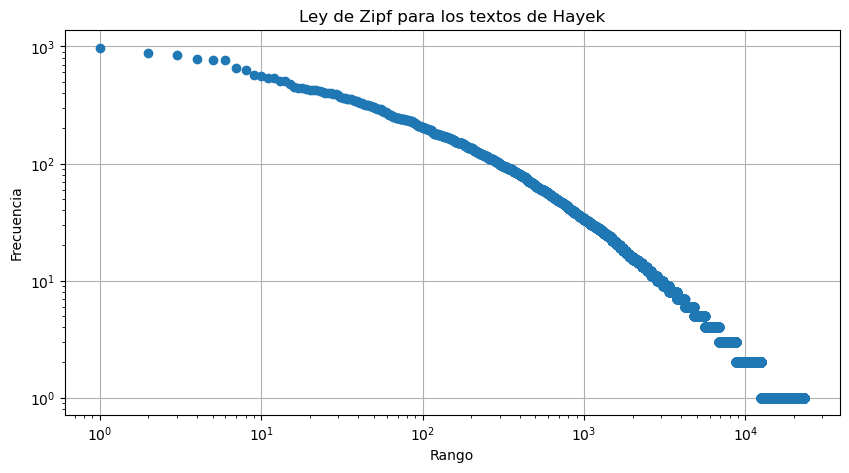

In [30]:
#graficaremos la ley de zipf de manera sencilla
#primero creamos una función que indique que vamos a graficar los datos obtenidos para esta ley
def plot_zipf(frequencies, title):
    ranks = np.arange(1, len(frequencies) + 1)
    #creamos un array (arreglo) de rangos para cada frecuencia. Los rangos van del 1 al número total de frecuencias.
    plt.figure(figsize=(10, 5)) #tamaño del gráfico
    plt.loglog(ranks, frequencies, marker='o', linestyle='None') #gráfico logarítmico
    plt.xlabel('Rango')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Graficar la Ley de Zipf para Keynes
plot_zipf(keynes_freq_sorted, 'Ley de Zipf para los textos de Keynes')

# Graficar la Ley de Zipf para Hayek
plot_zipf(hayek_freq_sorted, 'Ley de Zipf para los textos de Hayek')


Añadimos línea de ajuste a las frecuencias

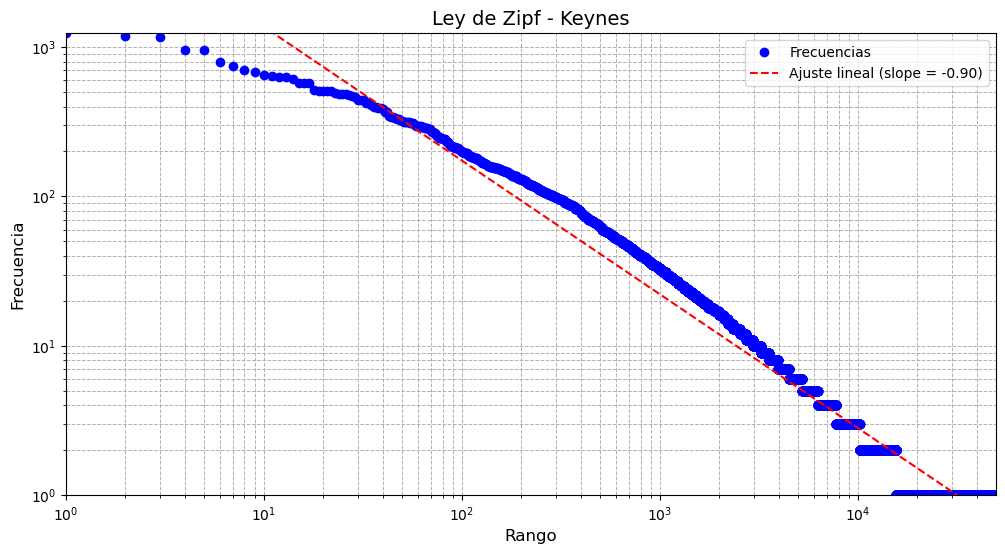

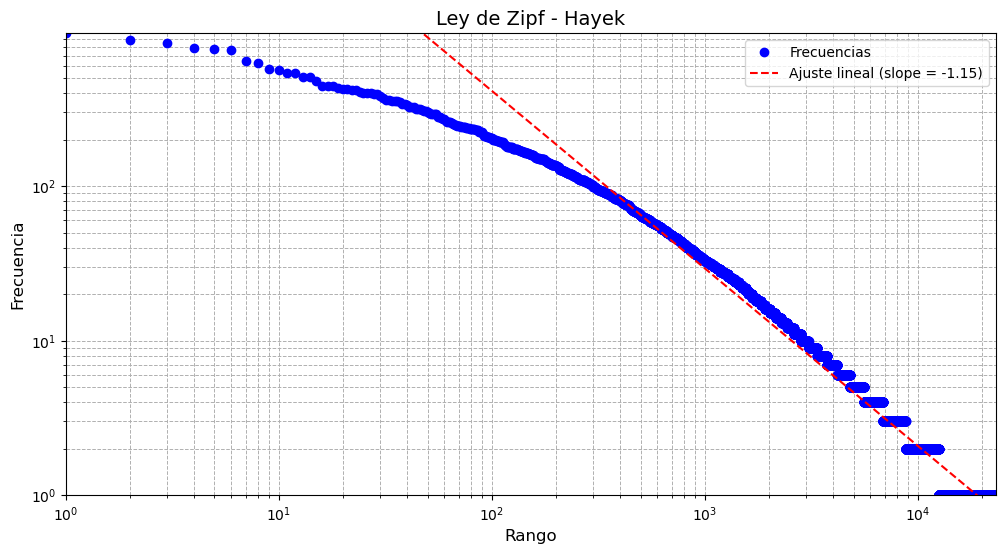

In [31]:
#gráfico de la ley de Zipf con una línea de ajuste de las frecuenicas
from scipy.stats import linregress # útil para realizar regresiones lineales
#definimos la función como antes para graficar 
def plot_zipf(frequencies, title):
    # Calculamos los rangos de frecuencias
    ranks = np.arange(1, len(frequencies) + 1)
    
    # Calculamos la línea de ajuste
    log_ranks = np.log10(ranks) #logaritmo en base10
    log_frequencies = np.log10(frequencies) 
    slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies) #realizamos la regresión lineal en los datos logarítmicos 
    fit_line = 10**(intercept + slope * log_ranks) #calculamos al línea de ajuste

    # Crear la gráfica
    plt.figure(figsize=(12, 6))
    plt.loglog(ranks, frequencies, 'o', color='blue', label='Frecuencias')
    plt.loglog(ranks, fit_line, 'r--', label=f'Ajuste lineal (slope = {slope:.2f})')
    #marcador en forma de círculo para las frecuencias y una línea discontinua roja para el ajuste
    plt.xlabel('Rango', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.legend()
    
    # Ajustamos los límites de los ejes
    plt.xlim(1, max(ranks))
    plt.ylim(min(frequencies), max(frequencies))
    
    # imprimos la gráfica
    plt.show()

# Graficar la Ley de Zipf para Keynes
plot_zipf(keynes_freq_sorted, 'Ley de Zipf - Keynes')

# Graficar la Ley de Zipf para Hayek
plot_zipf(hayek_freq_sorted, 'Ley de Zipf - Hayek')


#### Análisis de la frecuencia de ocurrencia de los términos en el corpus (TF-IDF) 

Esto nos permitirá  identificar y visualizar los términos más importantes en los textos de ambos autores.

Para ello se mostrarán los 20 términos más frecuentes de cada uno, según los valores de TF-IDF. Utilizaremos las librerías `seaborn`, que nos permitirá crear gráficos estadísticos con una interfaz atractiva y sencilla; `pandas`, que es necesaria para la manipulación y análisis de DataFrame, una estructura similar a las matrices pero que admite datos alfanumèéricos; y `TfidfVectorizer`, que nos servirá para convertir nuestra colección en una matriz TF-IDF.

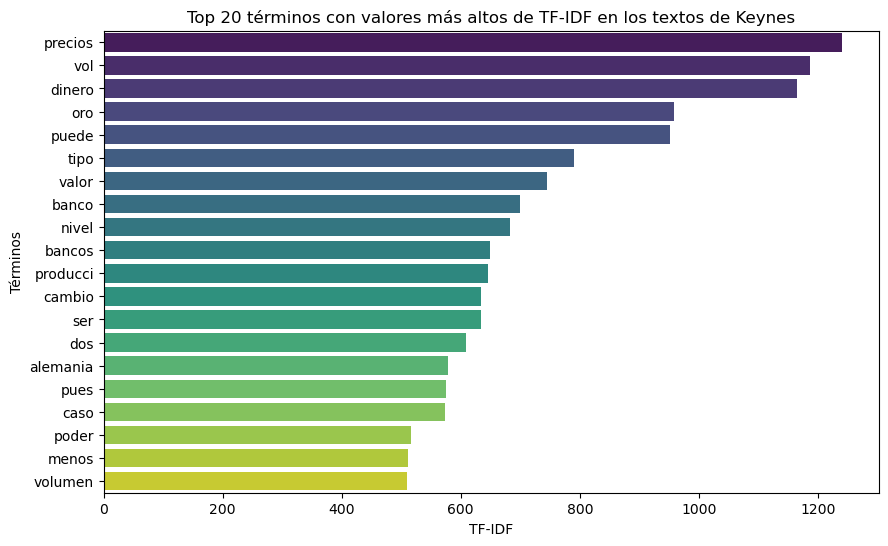

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Crearemos el vectorizador TF-IDF con un máximo de 20 términos
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(keynes_tokens) # Ajusta el vectorizador a los tokens y los transforma en una matriz TF-IDF.
terms = vectorizer.get_feature_names_out() #obtiene los nombres de los términos de la matriz

# Convertimos la matriz TF-IDF a un DataFrame para facilitar el manejo de datos
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

# Calculamos la suma de TF-IDF para cada término en todos los documentos
tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

# Seleccionamos los términos con los valores de TF-IDF más altos
top_n = 20  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

# Armamos las gráficas
plt.figure(figsize=(10, 6)) #indicamos tamaño
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis') #grafico de barras con paleta definida
plt.title('Top {} términos con valores más altos de TF-IDF en los textos de Keynes'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()

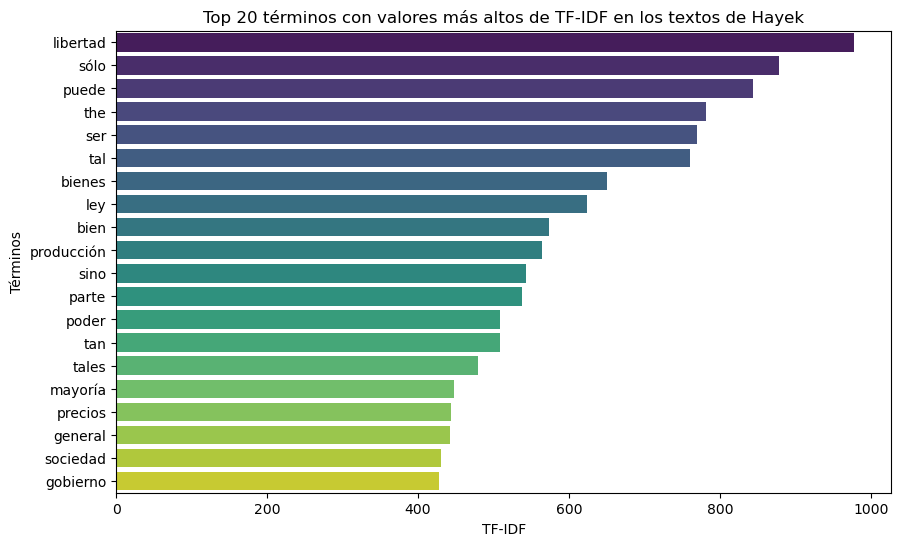

In [33]:
# Lo mismos para Hayek
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(hayek_tokens)
terms = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=terms)

tfidf_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)

top_n = 20  # Número de términos a visualizar
top_terms = tfidf_sums.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top {} términos con valores más altos de TF-IDF en los textos de Hayek'.format(top_n))
plt.xlabel('TF-IDF')
plt.ylabel('Términos')
plt.show()

### Nube de palabras 

Finalmente realizaremos una nube de palabras para cada uno de los autores, por medio de la librería `WordCloud`, para ello uniremos los tokens de los textos y definiremos los parámetros de nuestros gráficos. 

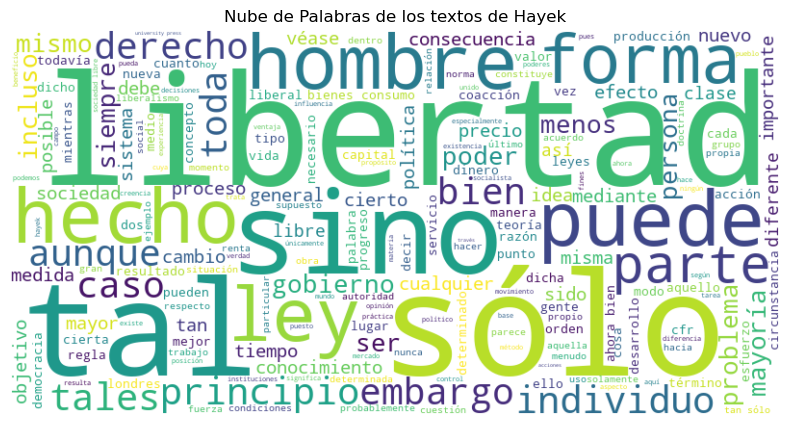

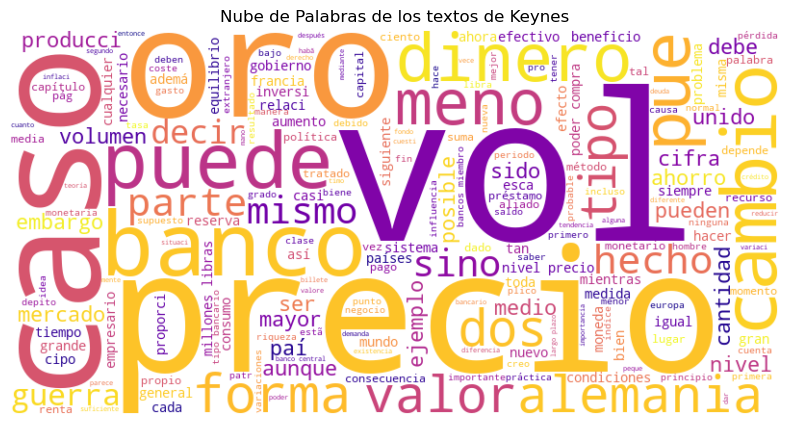

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unificamos los tokens en una sola cadena de texto
hayek_nube = ' '.join(hayek_tokens)  
keynes_nube = ' '.join(keynes_tokens)

# Crear la nube de palabras para Hayek
wordcloud_hayek = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(hayek_nube)

# Crear la nube de palabras para Keynes
wordcloud_keynes = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(keynes_nube)

# Visualizamos la nube para Hayek
plt.figure(figsize=(10, 5)) #tamaño
plt.imshow(wordcloud_hayek, interpolation='bilinear') #mehora la calidad de imagen con la interpolación
plt.axis('off') #ocultamos los ejes
plt.title('Nube de Palabras de los textos de Hayek')
plt.show()

# Visualizar la nube para Keynes
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_keynes, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los textos de Keynes')
plt.show()


### Ejercitación extra

Les propongo realizar nuevos gráficos y cálculos modificando las palabras vacías según lo observado en las gráficas expuestas.

* ¿Se observan diferencias muy pronunciadas?
* ¿En cuál de los autores es más radical?
* ¿Se les ocurren otros cálculos o gráficos para hacer?

### Bibliografía y recursos recomendados

* García Morgado, M. (2016). PyText: una librería para la minería de textos basada en Python.(https://hdl.handle.net/20.500.12371/12581)
* Kamakshaiah. (s. f.). Kamakshaiah/text-mining: Python scripts for text mining and analysis. (https://github.com/Kamakshaiah/text-mining)
* Samal, P. (2022, 19 noviembre). Text Mining in Python - [A Complete Guide](https://www.askpython.com/python/examples/text-mining-in-python)
* Tejashpopate. (2019, 30 julio). Text mining in Python. Kaggle. (https://www.kaggle.com/code/tejashpopate/text-mining-in-python/notebook)